# Import library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, measure

# Read And Resize Image

In [2]:
image = cv2.imread("tulisan.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width, channel = image.shape

print(f"Height: {height}")
print(f"Width: {width}")
print(f"Channel: {channel}")

Height: 900
Width: 1600
Channel: 3


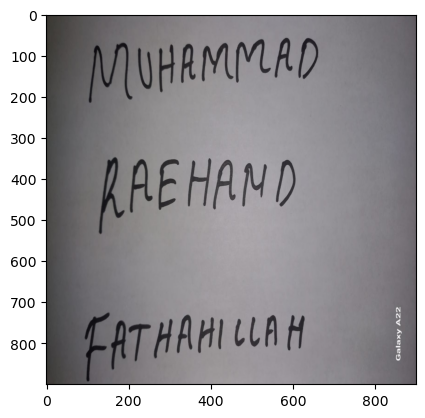

In [3]:
def resize_image(image):
    height, width, channel = image.shape
    if width > 1000:
        width = 900
        factor = width / height
        new_height = int(width / factor)

    image = cv2.resize(image, (width, height), interpolation = cv2.INTER_AREA)
    plt.imshow(image)
    return image
image = resize_image(image)

# Image Processing

In [4]:
def thresholding(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresholded_image = cv2.threshold(image_gray, 80, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(thresholded_image, cmap='gray')
    return thresholded_image

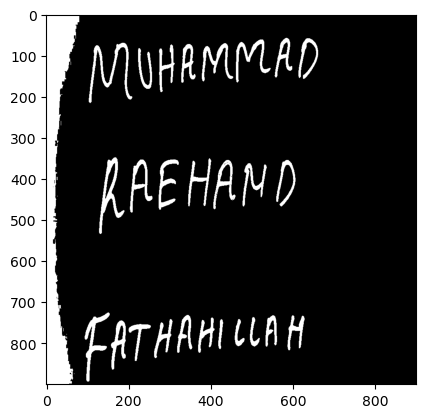

In [5]:
thresholded_image = thresholding(image)

# Line Segmentation

In [6]:
def dilation(image):
    kernel = np.ones((3,85), np.uint8)
    dilated_image = cv2.dilate(image, kernel, iterations = 1)
    plt.imshow(dilated_image, cmap='gray')
    return dilated_image

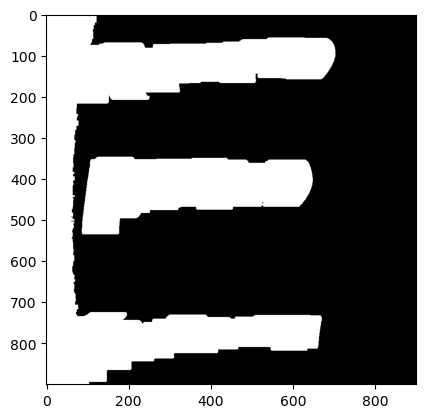

In [7]:
dilated_image = dilation(thresholded_image)

In [8]:
(contours, heirarchy) = cv2.findContours(dilated_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)

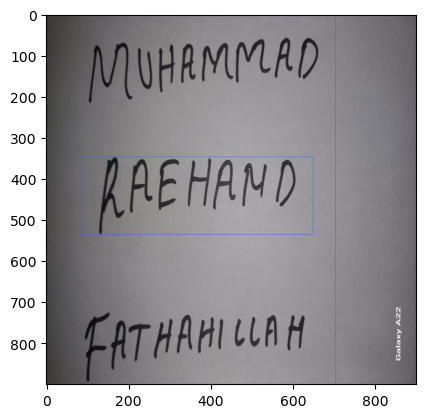

In [9]:
image_copy = image.copy()
for line in sorted_contours_lines:
    x, y, w, h = cv2.boundingRect(line)
    cv2.rectangle(image_copy, (x, y), (x + w, y + h), (40, 100, 250), 1)
plt.imshow(image_copy)

# Word Segmentation

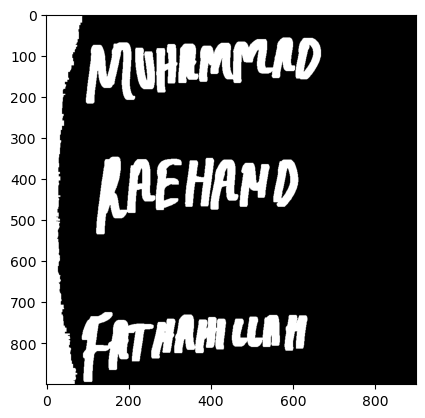

In [10]:
kernel = np.ones((3, 15), np.uint8)
dilated2 = cv2.dilate(thresholded_image, kernel, iterations = 1)
plt.imshow(dilated2, cmap='gray');

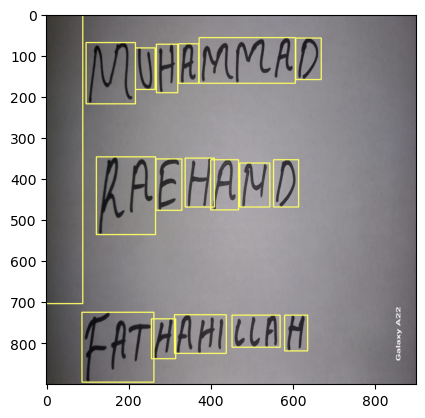

In [11]:
image_copy_3 = image.copy()
words_list = []

for line in sorted_contours_lines:
    x, y, w, h = cv2.boundingRect(line)
    roi_line = dilated2[y: y+w, x:x+w]

    (cnt, heirarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt, key=lambda cntr : cv2.boundingRect(cntr))

    for word in sorted_contour_words:
        x2, y2, w2, h2 = cv2.boundingRect(word)
        words_list.append([x+x2, y+y2, x+x2+w2, y+y2+h2])
        cv2.rectangle(image_copy_3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (255,255,100),2)

plt.imshow(image_copy_3)